# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

Fashion MNIST dataset which contains 70k grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

More information available here: https://www.tensorflow.org/tutorials/keras/classification

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploratory Data Analysis

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Explore few images from train dataset with numerical labels

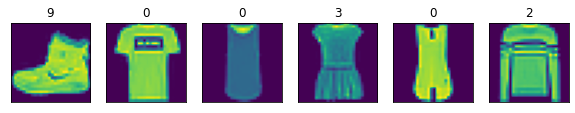

In [9]:
fig = plt.figure(figsize=[10, 8])
for i in range(6): # Plots first 6 images from the training dataset with the numerical labels
  ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(train_images[i])
  ax.set_title(str(train_labels[i]))


Check the gradient of colours with respect to color range i.e., 0 to 255

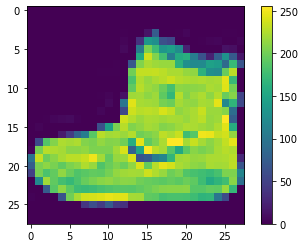

In [10]:
plt.figure()
plt.imshow(train_images[0]) # plots the first image in the training dataset
plt.colorbar()
plt.grid(False)
plt.show()

Plot images with their actual labels

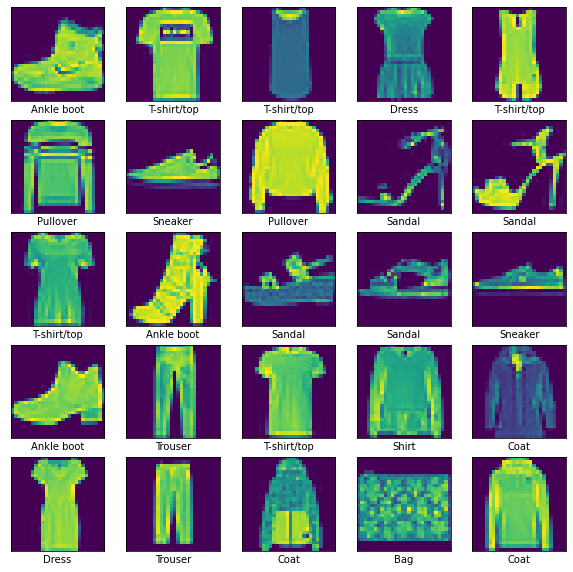

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):     # plots first 25 images in the training dataset with the actual class labels
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Plotting images in binary colors

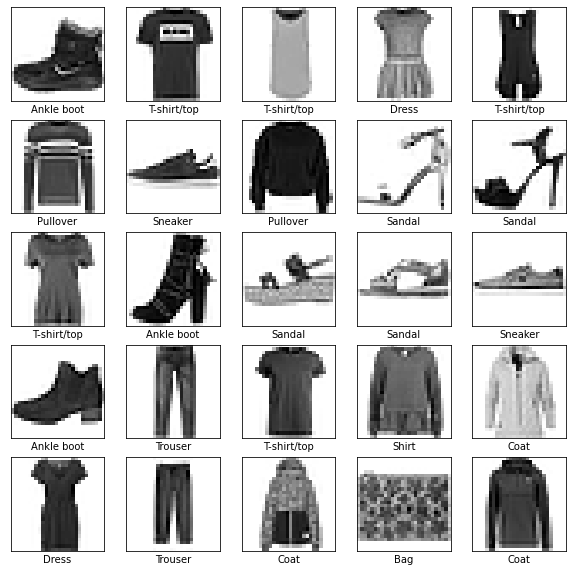

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):     # plots first 25 images in binary colors in the training dataset with the actual class labels
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Preprocessing

Each color channel in a RGB (Red, Green, Blue) image has 8 bits. The range for each color is 0-255 (as we have seen above). Diviing by 255 is a means to normalize the images vector makes the computations easier, faster and more precise.
Therefore by dividing the image vector by 255, all values come in range of 0-1, where 0 signifies black and 1 signifies white.

In [13]:
train_images = train_images / 255.0 # divide all images in training dataset with 255, brings down the range to [0-1]

test_images = test_images / 255.0 # divide all images in test dataset with 255, brings down the range to [0-1]

# Model Building

### MLP classifier with GridSearchCV

**GridSearchCV:** It is a library function that is used for hyperparameters tuning. This helps in automating the process of trying each and every combination of hyperparameters and get the best parameters. Predefined values of hyperparameters are pased to the function.

It also considers the cross validation techniques and tries all possible values combinations using cross validation.

Parameters for GridSearchCV:

1. estimator: model instance for which hyperparameters are being checked
2. param_grid: dictionary object that has hyperparameters values
3. cv: type of cross validation being used
4. verbose: print detailed logs in standard output
5. return_train_score: returns the training score, by default False



More details available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**StratifiedKFold cross validation**: 

Cross validation is a technique to evaluate the performance of machine learning models. It also helps in protecting the model from overfitting by dividing the dataset into multiple folds, run the algorithm on all folds, and then average the overall error.

In Stratified sampling, it is ensured that each fold is a good representative of the whole data.

More details availabel at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

**MLPClassifier**:

MLP classifier stands for Multi layer perceptron classifier. It has an underlying neural network architecture to perform the task of classification.
Parameters for MLPClassifier:
1. hidden_layer_sizes: allows to set the number of layers and number of neurons in each layer
2. activation: activation function for hidden layers
3. learning_rate_init: initial learning rate used to control the step-size in updating weights.

More details available at: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [14]:
x_train = train_images.reshape(train_images.shape[0], -1).astype(np.float32) # convert the train images matrix of 28x28 dimension into a single vector of 784
x_test = test_images.reshape(test_images.shape[0], -1).astype(np.float32) # convert the test images matrix of 28x28 dimension into a single vector of 784

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Setup 1: Train MLP clasifier model with other hyperparamters
1. Hidden layer size: [50,75]
2. Activation Function: Relu, Tanh
3. Learning rate (Alpha): 0.001, 0.0001

In [16]:
cv = StratifiedKFold(shuffle=True, random_state=2) # Create the object of StratifiedKFold class, using random state for reproducible results

param_grid = {
    'hidden_layer_sizes': [50, 75],
    'activation': ['tanh', 'relu'],
    # 'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.0001, 0.001]
} # create dictionary for holding the hyperparamters values

gridSearch1 = GridSearchCV(MLPClassifier(), param_grid, cv=cv, verbose=2, return_train_score=True) # Create the GridSearchCV object by passing MLPClassifier estimator, hyperparameters dicitonary

gridSearch1.fit(x_train, train_labels) # fit it on the training data

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.0001; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.0001; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.0001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.0001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.0001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.001; total time= 1.3min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.001; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=50, learning_rate_init=0.001; total time= 1.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [50, 75],
                         'learning_rate_init': [0.0001, 0.001]},
             return_train_score=True, verbose=2)

In [17]:
print("Score: ", gridSearch1.best_score_) # this returns the best test score in all folds

Score:  0.8923166666666666


In [18]:
print('Parameters: ', gridSearch1.best_params_) # returns the dictionary with best hyperparameters

Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': 75, 'learning_rate_init': 0.0001}


In [19]:
print(gridSearch1.cv_results_) # contains the training time, parameters dictionary for all parameter candidates

{'mean_fit_time': array([73.11558871, 75.5376986 , 84.20892038, 83.09468579, 74.99719257,
       81.41548142, 93.28068094, 91.33181486]), 'std_fit_time': array([3.02896526, 6.58799163, 0.75535096, 0.95384809, 0.59919137,
       2.75947402, 7.57166724, 5.10303519]), 'mean_score_time': array([0.0308475 , 0.02869124, 0.03417354, 0.03672843, 0.02842703,
       0.03192401, 0.02861495, 0.02864614]), 'std_score_time': array([0.00349505, 0.00423709, 0.0046849 , 0.00768568, 0.00343651,
       0.00403568, 0.00306091, 0.00241543]), 'param_activation': masked_array(data=['tanh', 'tanh', 'tanh', 'tanh', 'relu', 'relu', 'relu',
                   'relu'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[50, 50, 75, 75, 50, 50, 75, 75],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_ra

Create a Dataframe for visualization of the model's parameters values along with train and test scores.

In [20]:
results1 = pd.DataFrame(gridSearch1.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score', 'mean_fit_time']]

In [21]:
results1.sort_values('rank_test_score')

,params,mean_train_score,mean_test_score,rank_test_score,mean_fit_time
2,"{'activation': 'tanh', 'hidden_layer_sizes': 7...",0.937667,0.892317,1,84.208920
0,"{'activation': 'tanh', 'hidden_layer_sizes': 5...",0.927437,0.889183,2,73.115589
6,"{'activation': 'relu', 'hidden_layer_sizes': 7...",0.930117,0.889150,3,93.280681
4,"{'activation': 'relu', 'hidden_layer_sizes': 5...",0.917767,0.883733,4,74.997193
7,"{'activation': 'relu', 'hidden_layer_sizes': 7...",0.990158,0.879950,5,91.331815
3,"{'activation': 'tanh', 'hidden_layer_sizes': 7...",0.993788,0.877817,6,83.094686
5,"{'activation': 'relu', 'hidden_layer_sizes': 5...",0.974329,0.876167,7,81.415481
1,"{'activation': 'tanh', 'hidden_layer_sizes': 5...",0.988696,0.875333,8,75.537699


### Train the MLP Classifier with best hyperparameters values

In [22]:
mlp1 = MLPClassifier(activation='tanh', hidden_layer_sizes=75, learning_rate_init=0.0001)

In [23]:
mlp1.get_params() # dictionary of all MLP classifier paramters

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 75,
 'learning_rate': 'constant',
 'learning_rate_init': 0.0001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [24]:
mlp1.fit(x_train, train_labels) # fit the classifier on the training data

MLPClassifier(activation='tanh', hidden_layer_sizes=75,
              learning_rate_init=0.0001)

### Prediction on test data

In [25]:
pred1 = mlp1.predict(x_test) # use predict method for classifying the test dataset images

Training and Test scores

In [26]:
print("Training set score: %f" % mlp1.score(x_train, train_labels))
print("Test set score: %f" % mlp1.score(x_test, test_labels))

Training set score: 0.939633
Test set score: 0.885600


### Visualization of correctly/ incorrectly classified images from test dataset

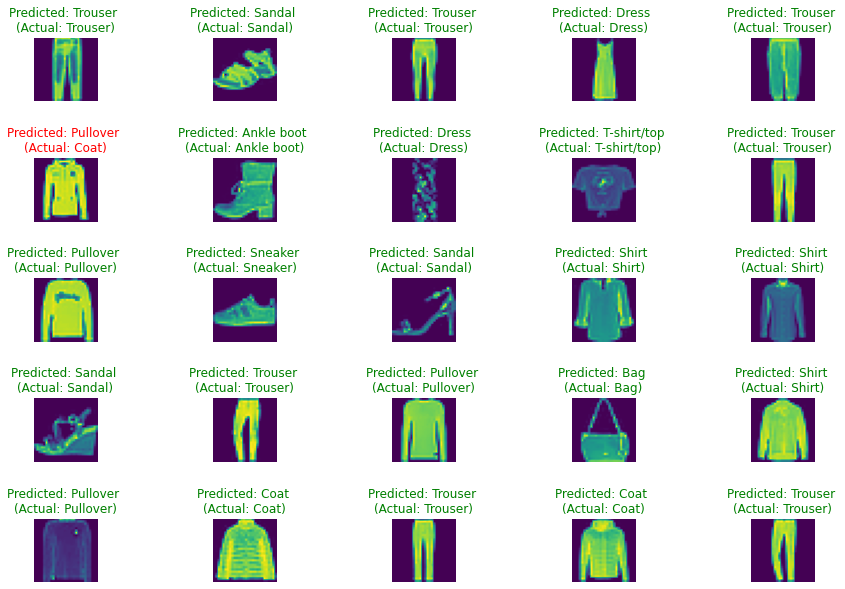

In [27]:
# np.random.seed(2)
height = 5
width = 5

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(15,10))
axes = axes.ravel()
for i in range(0, height*width):    # Plot 25 images from test dataset
    index = np.random.randint(len(pred1))    # randomly selects the index of images
    true_label, img = test_labels[index], test_images[index]
    plt.grid(False)
    axes[i].imshow(img)
    
    pred_label = pred1[index]
    if pred_label == true_label:
        color = 'green'     # Green color when prediction is correct or same as actual class
    else:
        color = 'red'       # Red color when prediction is incorrect or not same as actual class
    axes[i].set_title("Predicted: {} \n(Actual: {})".format(class_names[pred_label],
                                class_names[true_label]),
                                color=color)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

### Confusion Matrix

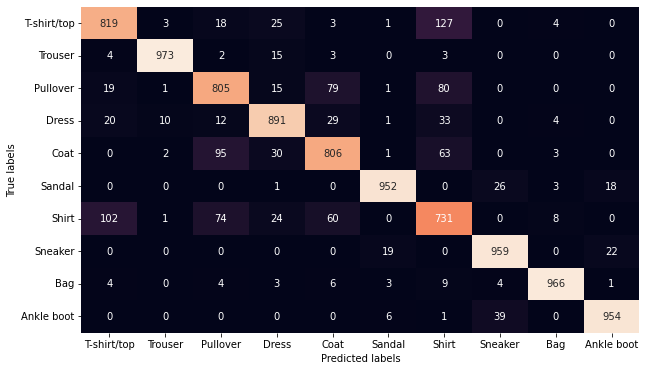

In [28]:
cm = confusion_matrix(test_labels, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names, cbar=False)    # Plots the confusion matrix using seaborn library
plt.xlabel('Predicted labels');plt.ylabel('True labels');

### Classification Report

In [29]:
cr = classification_report(test_labels, pred1, target_names=class_names) # returns the classification report with precision, recall, f1 score for each class
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.82      0.81      0.81      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.70      0.73      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Setup 2: Train MLP clasifier model with best hyperparameters

1. Activation Function: Relu, Tanh
2. Hdden layer size: 100 , 150
3. Learning rate (Alpha): 0.001, 0.0001

In [30]:
cv = StratifiedKFold(shuffle=True, random_state=2) # Create the object of StratifiedKFold class, using random state for reproducible results

param_grid = {
    'hidden_layer_sizes': [100,150],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.0001, 0.001]
} # create dictionary for holding the hyperparamters values

gridSearch2 = GridSearchCV(MLPClassifier(), param_grid, cv=cv, verbose=2, return_train_score=True) # Create the GridSearchCV object by passing MLPClassifier estimator, hyperparameters dicitonary

gridSearch2.fit(x_train, train_labels) # fit it on the training data

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.0001; total time= 1.9min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.0001; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.0001; total time= 1.9min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.0001; total time= 2.1min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.0001; total time= 2.0min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.001; total time= 1.9min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.001; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.001; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.001; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=100, learning_rate_init=0.001; tota

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [100, 150],
                         'learning_rate_init': [0.0001, 0.001]},
             return_train_score=True, verbose=2)

In [31]:
print("Score: ", gridSearch2.best_score_) # this returns the best test score in all folds

Score:  0.8956833333333334


In [32]:
print('Parameters: ', gridSearch2.best_params_) # returns the dictionary with best hyperparameters

Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': 150, 'learning_rate_init': 0.0001}


In [33]:
print(gridSearch2.cv_results_) # contains the training time, parameters dictionary for all parameter candidates

{'mean_fit_time': array([116.19963369, 101.0515511 , 145.53008618, 123.16970911,
        98.56234026,  99.37640567, 147.6408308 , 120.67309747]), 'std_fit_time': array([ 7.90740896,  7.02408738,  2.28896926, 11.09097359,  2.22829893,
        9.97967732,  7.52722561, 14.34210163]), 'mean_score_time': array([0.04310713, 0.0422955 , 0.05054054, 0.05444241, 0.03627567,
       0.02919264, 0.04067059, 0.03702998]), 'std_score_time': array([0.00567529, 0.00451611, 0.0034076 , 0.00434768, 0.00321069,
       0.00227362, 0.00531056, 0.00267989]), 'param_activation': masked_array(data=['tanh', 'tanh', 'tanh', 'tanh', 'relu', 'relu', 'relu',
                   'relu'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[100, 100, 150, 150, 100, 100, 150, 150],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=obj

Create a Dataframe for visualization of the model's parameters values along with train and test scores.

In [34]:
results2 = pd.DataFrame(gridSearch2.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score', 'mean_fit_time']]

In [35]:
results2.sort_values('rank_test_score')

,params,mean_train_score,mean_test_score,rank_test_score,mean_fit_time
2,"{'activation': 'tanh', 'hidden_layer_sizes': 1...",0.952417,0.895683,1,145.530086
0,"{'activation': 'tanh', 'hidden_layer_sizes': 1...",0.944479,0.893900,2,116.199634
6,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.951092,0.893500,3,147.640831
3,"{'activation': 'tanh', 'hidden_layer_sizes': 1...",0.997500,0.891850,4,123.169709
4,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.936354,0.890033,5,98.562340
7,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.994387,0.888133,6,120.673097
1,"{'activation': 'tanh', 'hidden_layer_sizes': 1...",0.998304,0.885567,7,101.051551
5,"{'activation': 'relu', 'hidden_layer_sizes': 1...",0.991575,0.885233,8,99.376406


### Train the MLP Classifier with best hyperparameters values


In [36]:
mlp2 = MLPClassifier(activation='tanh', hidden_layer_sizes=150, learning_rate_init=0.0001)

In [37]:
mlp2.get_params() # dictionary of all MLP classifier paramters

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 150,
 'learning_rate': 'constant',
 'learning_rate_init': 0.0001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
mlp2.fit(x_train, train_labels) # fit the classifier on the training data

MLPClassifier(activation='tanh', hidden_layer_sizes=150,
              learning_rate_init=0.0001)

### Prediction on test data

In [39]:
pred2 = mlp2.predict(x_test) # use predict method for classifying the test dataset images

Training and Test scores

In [40]:
print("Training set score: %f" % mlp2.score(x_train, train_labels))
print("Test set score: %f" % mlp2.score(x_test, test_labels))

Training set score: 0.954400
Test set score: 0.888800


### Visualization of correctly/ incorrectly classified images from test dataset

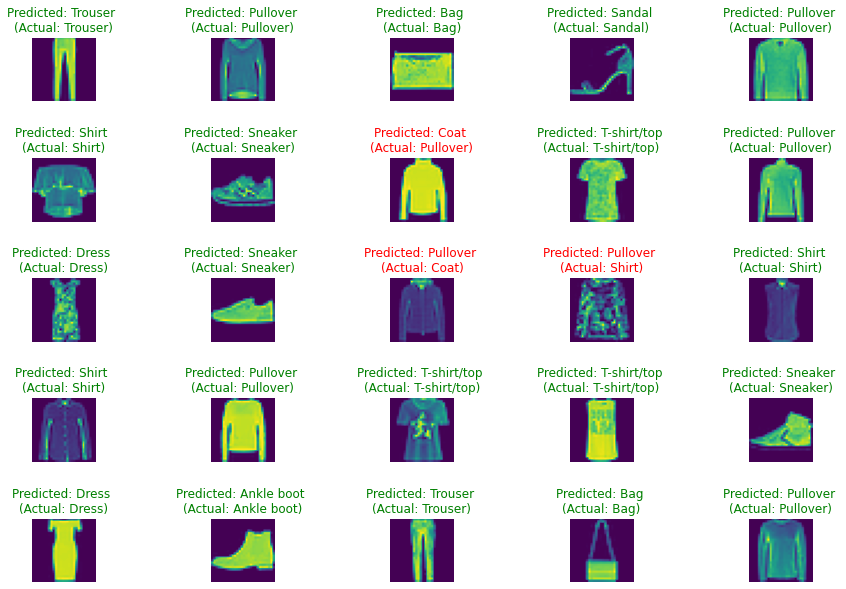

In [41]:
# np.random.seed(2)
height = 5
width = 5

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(15,10))
axes = axes.ravel()
for i in range(0, height*width):    # Plot 25 images from test dataset
    index = np.random.randint(len(pred2))    # randomly selects the index of images
    true_label, img = test_labels[index], test_images[index]
    plt.grid(False)
    axes[i].imshow(img)
    
    pred_label = pred2[index]
    if pred_label == true_label:    
        color = 'green'     # Green color when prediction is correct or same as actual class
    else:
        color = 'red'       # Red color when prediction is incorrect or not same as actual class
    axes[i].set_title("Predicted: {} \n(Actual: {})".format(class_names[pred_label],
                                class_names[true_label]),
                                color=color)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

### Confusion Matrix

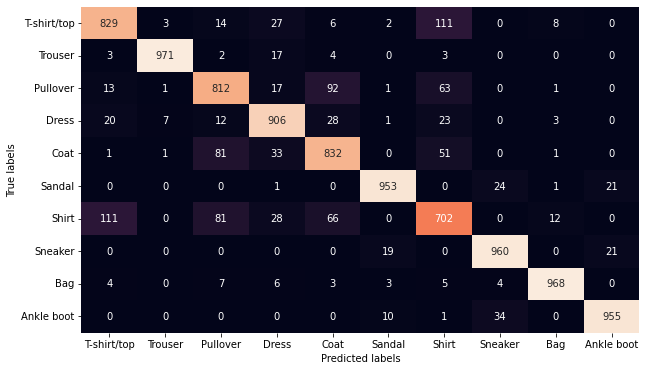

In [42]:
cm = confusion_matrix(test_labels, pred2)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names, cbar=False)    # Plots the confusion matrix using seaborn library
plt.xlabel('Predicted labels');plt.ylabel('True labels');

### Classification Report

In [43]:
cr = classification_report(test_labels, pred2, target_names=class_names) # returns the classification report with precision, recall, f1 score for each class
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.81      0.83      0.82      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.73      0.70      0.72      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Plot Number of hidden layers vs. Mean score

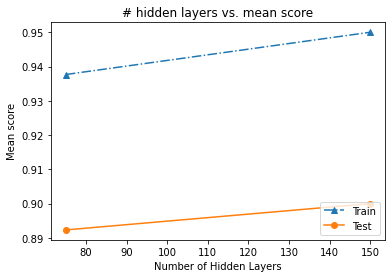

In [44]:
x = np.array([gridSearch1.best_params_['hidden_layer_sizes'], gridSearch2.best_params_["hidden_layer_sizes"]])
train_scores = np.array([round(results1[results1['rank_test_score']==1]['mean_train_score'], 75), round(results2[results2['rank_test_score']==1]['mean_train_score'], 2)])
test_scores = np.array([round(results1[results1['rank_test_score']==1]['mean_test_score'], 150), round(results2[results2['rank_test_score']==1]['mean_test_score'], 2)])
plt.plot(x, train_scores, '-.', marker='^')
plt.plot(x, test_scores, '-', marker='o')
plt.legend(["Train", "Test"], loc ="lower right")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Mean score")
plt.title('# hidden layers vs. mean score')
plt.show()

# References

https://www.kaggle.com/code/anindya2906/fashion-mnist-classification/notebook

https://www.kaggle.com/code/arnavr10880/fashion-mnist-lenet-cnn-old-is-gold

